<a href="https://colab.research.google.com/github/pucuk-yusup/Portofolio-Analisis/blob/main/Timeseries_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies (kalau belum terinstal di Colab)
!pip install pandas matplotlib statsmodels

# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Buat dataset contoh (time series penjualan bulanan)
data = {
    "Month": pd.date_range(start="2020-01", periods=36, freq="M"),
    "Sales": [120, 135, 150, 160, 170, 190, 210, 220, 250, 270, 300, 310,
              320, 340, 360, 380, 400, 430, 450, 460, 480, 500, 520, 540,
              550, 580, 600, 620, 640, 670, 700, 730, 760, 800, 820, 850],
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

<ipython-input-2-94a75d2aace4>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2020-01", periods=36, freq="M"),


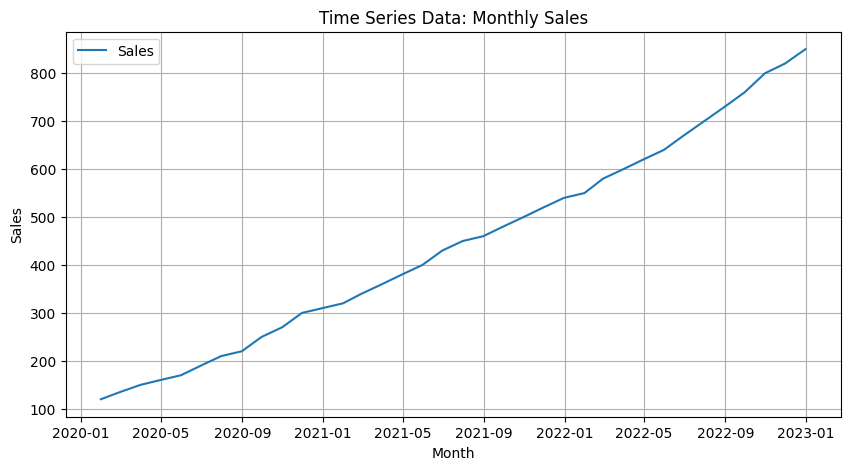

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(df["Sales"], label="Sales")
plt.title("Time Series Data: Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()
plt.savefig("visualisasi_sales.png")  # Simpan visualisasi sebagai file
plt.show()

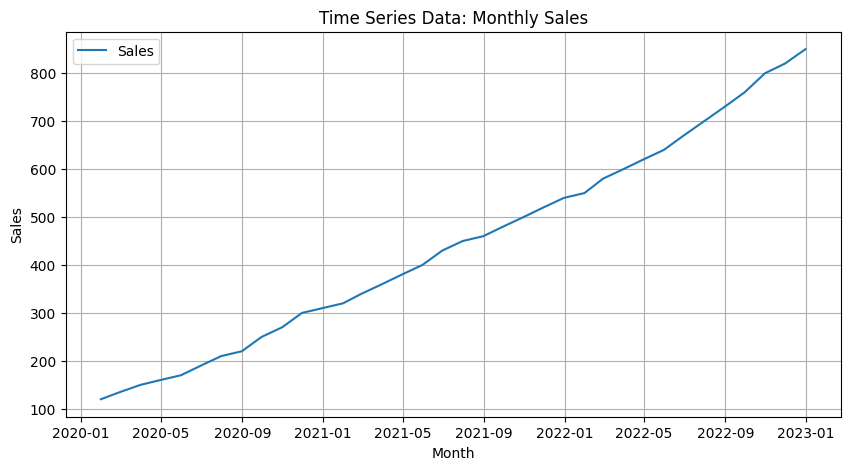

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
#simpan
from google.colab import files  # Pastikan modul ini diimpor

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(df["Sales"], label="Sales")
plt.title("Time Series Data: Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.savefig("visualisasi_sales.png")  # Simpan visualisasi sebagai file
plt.show()

files.download("visualisasi_sales.png")

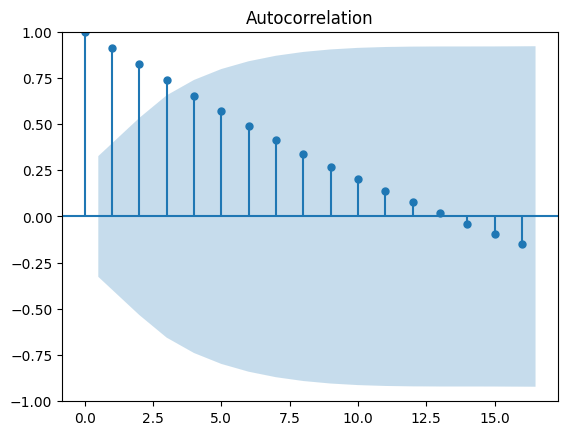

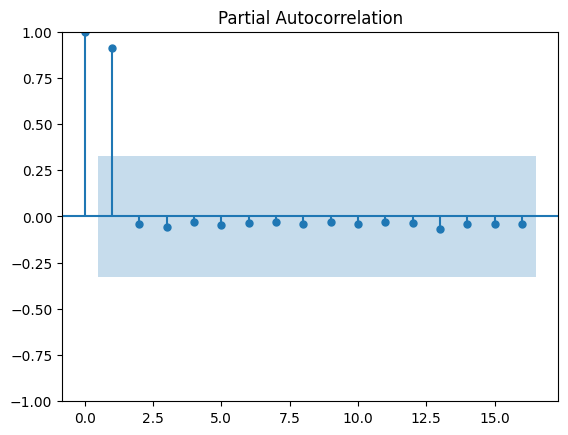

In [4]:
# ACF dan PACF untuk melihat keterkaitan
plot_acf(df["Sales"])
plot_pacf(df["Sales"])
plt.show()

In [5]:
# Buat model ARIMA
model = ARIMA(df["Sales"], order=(1, 1, 1))
model_fit = model.fit()

# Lihat ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.195
Date:                Sat, 15 Feb 2025   AIC                            246.390
Time:                        02:01:36   BIC                            251.057
Sample:                    01-31-2020   HQIC                           248.001
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.010     95.350      0.000       0.977       1.018
ma.L1         -0.7691      0.118     -6.529      0.000      -1.000      -0.538
sigma2        51.3731     14.891      3.450      0.0

In [6]:
# Forecast ke depan (12 bulan berikutnya)
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start="2023-01", periods=12, freq="M")
forecast_df = pd.DataFrame({"Forecast": forecast}, index=forecast_index)


<ipython-input-6-1baac1f6b067>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start="2023-01", periods=12, freq="M")


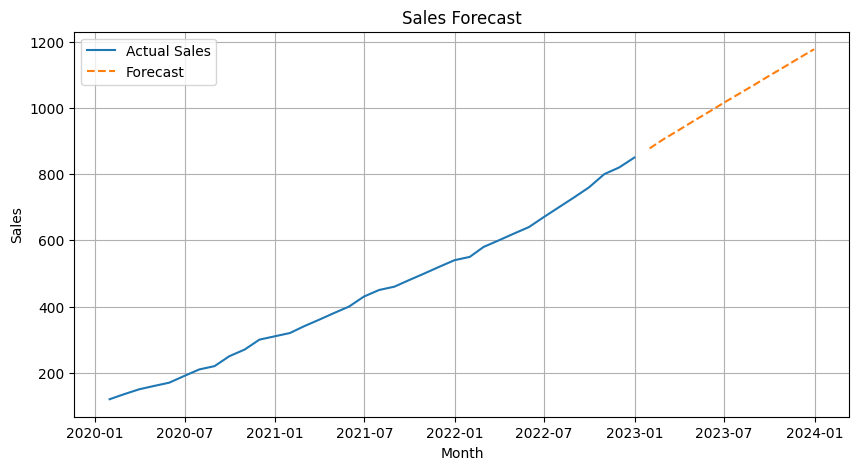

In [7]:
# Visualisasi hasil forecasting
plt.figure(figsize=(10, 5))
plt.plot(df["Sales"], label="Actual Sales")
plt.plot(forecast_df["Forecast"], label="Forecast", linestyle="--")
plt.title("Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

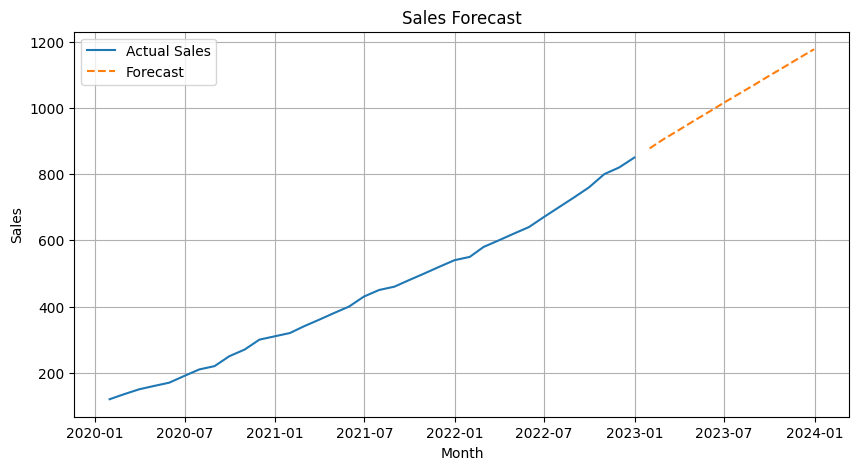

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Simpan Visualisasi hasil forecasting
from google.colab import files  # Pastikan modul ini diimpor

plt.figure(figsize=(10, 5))
plt.plot(df["Sales"], label="Actual Sales")
plt.plot(forecast_df["Forecast"], label="Forecast", linestyle="--")
plt.title("Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.savefig("forecast_plot.png")  # Simpan hasil forecast sebagai file
plt.show()

# Download file
files.download("forecast_plot.png")

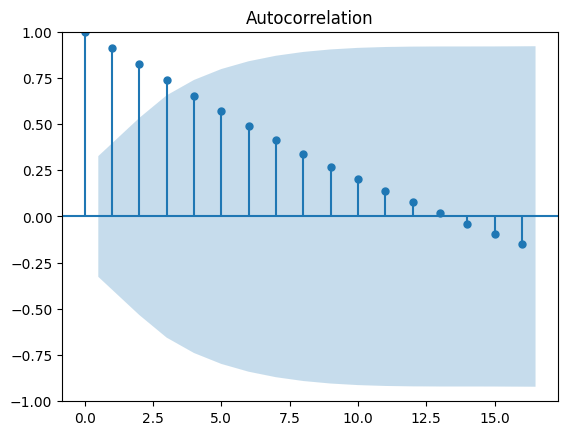

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

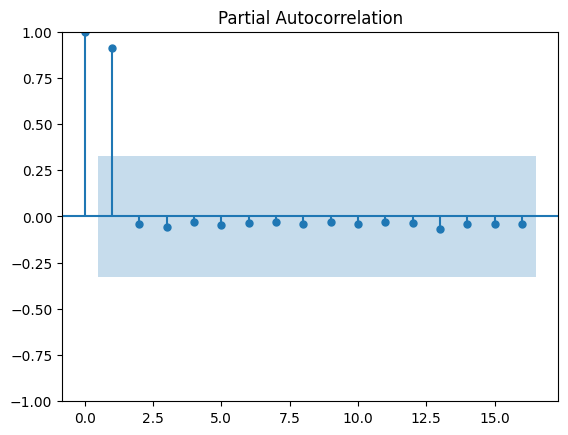

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#simpan visualiasi ACF & PACF

from google.colab import files  # Pastikan modul ini diimpor

# ACF Plot
plot_acf(df["Sales"])
plt.savefig("acf_plot.png")  # Simpan ACF sebagai file
plt.show()

# Download file
files.download("acf_plot.png")

# PACF Plot
plot_pacf(df["Sales"])
plt.savefig("pacf_plot.png")  # Simpan PACF sebagai file
plt.show()

# Download file
files.download("pacf_plot.png")